## Import Libraries

In [111]:
import pandas as pd
import numpy as np
import nltk

## Load data

### Job dataset

In [112]:
df_jobs = pd.read_csv("Combined_Jobs_Final.csv")
df_jobs.head()

,Job.ID,Provider,Status,Slug,Title,Position,Company,City,State.Name,State.Code,...,Industry,Job.Description,Requirements,Salary,Listing.Start,Listing.End,Employment.Type,Education.Required,Created.At,Updated.At
0,111,1,open,palo-alto-ca-tacolicious-server,Server @ Tacolicious,Server,Tacolicious,Palo Alto,California,CA,...,Food and Beverages,Tacolicious' first Palo Alto store just opened...,NaN,8.00,NaN,NaN,Part-Time,NaN,2013-03-12 02:08:28 UTC,2014-08-16 15:35:36 UTC
1,113,1,open,san-francisco-ca-claude-lane-kitchen-staff-chef,Kitchen Staff/Chef @ Claude Lane,Kitchen Staff/Chef,Claude Lane,San Francisco,California,CA,...,Food and Beverages,\r\n\r\nNew French Brasserie in S.F. Financia...,NaN,0.00,NaN,NaN,Part-Time,NaN,2013-04-12 08:36:36 UTC,2014-08-16 15:35:36 UTC
2,117,1,open,san-francisco-ca-machka-restaurants-corp-barte...,Bartender @ Machka Restaurants Corp.,Bartender,Machka Restaurants Corp.,San Francisco,California,CA,...,Food and Beverages,We are a popular Mediterranean wine bar and re...,NaN,11.00,NaN,NaN,Part-Time,NaN,2013-07-16 09:34:10 UTC,2014-08-16 15:35:37 UTC
3,121,1,open,brisbane-ca-teriyaki-house-server,Server @ Teriyaki House,Server,Teriyaki House,Brisbane,California,CA,...,Food and Beverages,● Serve food/drinks to customers in a profess...,NaN,10.55,NaN,NaN,Part-Time,NaN,2013-09-04 15:40:30 UTC,2014-08-16 15:35:38 UTC
4,127,1,open,los-angeles-ca-rosa-mexicano-sunset-kitchen-st...,Kitchen Staff/Chef @ Rosa Mexicano - Sunset,Kitchen Staff/Chef,Rosa Mexicano - Sunset,Los Angeles,California,CA,...,Food and Beverages,"Located at the heart of Hollywood, we are one ...",NaN,10.55,NaN,NaN,Part-Time,NaN,2013-07-17 15:26:18 UTC,2014-08-16 15:35:40 UTC


In [113]:
df_jobs.shape

(84090, 23)

In [191]:
len(df_jobs['City'].unique())

5470

In [114]:
df_jobs.isnull().sum()

Job.ID                    0
Provider                  0
Status                    0
Slug                      0
Title                     0
Position                  0
Company                2271
City                    135
State.Name              171
State.Code              171
Address               84054
Latitude                  0
Longitude                 0
Industry              83823
Job.Description          56
Requirements          84090
Salary                83861
Listing.Start           683
Listing.End             167
Employment.Type          10
Education.Required      267
Created.At                0
Updated.At                0
dtype: int64

#### From the above list we see that there are lot of NaN values, we need to perform data cleaning for each column.

## Feature Selection

#### Selecting the columns for the jobs corpus

For this example we only consider 8 important columns: 'Job.ID', 'Title', 'Position', 'Company','City', 'Employment.Type','Education.Required','Job.Description'.

In [115]:
cols = ['Job.ID']+['Title']+['Position']+ ['Company']+['City']+['Employment.Type']+['Education.Required']+['Job.Description']
df_jobs =df_jobs[cols]
df_jobs.columns = ['Job.ID', 'Title', 'Position', 'Company','City', 'Empl_type','Educ_req','Job_Description']
df_jobs.head()

,Job.ID,Title,Position,Company,City,Empl_type,Educ_req,Job_Description
0,111,Server @ Tacolicious,Server,Tacolicious,Palo Alto,Part-Time,NaN,Tacolicious' first Palo Alto store just opened...
1,113,Kitchen Staff/Chef @ Claude Lane,Kitchen Staff/Chef,Claude Lane,San Francisco,Part-Time,NaN,\r\n\r\nNew French Brasserie in S.F. Financia...
2,117,Bartender @ Machka Restaurants Corp.,Bartender,Machka Restaurants Corp.,San Francisco,Part-Time,NaN,We are a popular Mediterranean wine bar and re...
3,121,Server @ Teriyaki House,Server,Teriyaki House,Brisbane,Part-Time,NaN,● Serve food/drinks to customers in a profess...
4,127,Kitchen Staff/Chef @ Rosa Mexicano - Sunset,Kitchen Staff/Chef,Rosa Mexicano - Sunset,Los Angeles,Part-Time,NaN,"Located at the heart of Hollywood, we are one ..."


## Data Cleaning

#### Check null values

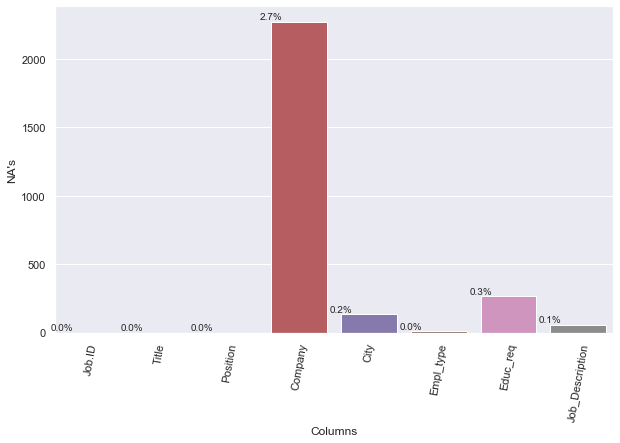

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
x = df_jobs.columns
y = df_jobs.isnull().sum()
plt.figure(figsize=(10,6))
sns.set()
sns.barplot(x,y)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(),
            height + 2,
            str(100*round(int(height)/df_jobs.shape[0], 3)) +"%",
            fontsize=10, ha='center', va='bottom')
ax.set_xlabel("Columns")
ax.set_ylabel("NA's")
plt.xticks(rotation=80)

plt.show()

In [117]:
df_nan_city = df_jobs[pd.isnull(df_jobs['City'])]
print(df_nan_city.shape)
df_nan_city.head()

(135, 8)


,Job.ID,Title,Position,Company,City,Empl_type,Educ_req,Job_Description
3425,142044,Registered Nurse (RN) @ St. Francis Hospital,Registered Nurse (RN),St. Francis Hospital,NaN,Full-Time/Part-Time,Associate Degree,Under the direction of the Clinical Coordinato...
3433,142054,Sales Representative - Business Development Op...,Sales Representative - Business Development Op...,CHI Payment Systems,NaN,Full-Time/Part-Time,High School Diploma,"If you&rsquo;re energetic, motivated, hardwork..."
3434,142055,New Business Executive @ CHI Payment Systems,New Business Executive,CHI Payment Systems,NaN,Full-Time/Part-Time,High School Diploma,"If you&rsquo;re energetic, motivated, hardwork..."
3435,142056,Outside Sales Representative (Business Develop...,Outside Sales Representative (Business Develop...,CHI Payment Systems,NaN,Full-Time/Part-Time,High School Diploma,"If you&rsquo;re energetic, motivated, hardwork..."
3436,142057,Outside Sales Representative @ CHI Payment Sys...,Outside Sales Representative,CHI Payment Systems,NaN,Full-Time/Part-Time,High School Diploma,"If you&rsquo;re energetic, motivated, hardwork..."


In [118]:
df_nan_city.groupby(['Company'])['City'].count()

Company
Academic Year In America                0
CBS Healthcare Services and Staffing    0
CHI Payment Systems                     0
Driveline Retail                        0
Educational Testing Services            0
Genesis Health System                   0
Genesis Health Systems                  0
Home Instead Senior Care                0
St. Francis Hospital                    0
Volvo Group                             0
Name: City, dtype: int64

We see that there are only 10 companies' cities that have NaN values. So I can manually add their head quarters's location as their location (by simply searching at google).

In [119]:
df_jobs['Company'] = df_jobs['Company'].replace(['Genesis Health Systems'], 'Genesis Health System')
df_jobs.loc[df_jobs.Company == 'CHI Payment Systems', 'City'] = 'Illinois'
df_jobs.loc[df_jobs.Company == 'Academic Year In America', 'City'] = 'Stamford'
df_jobs.loc[df_jobs.Company == 'CBS Healthcare Services and Staffing ', 'City'] = 'Urbandale'
df_jobs.loc[df_jobs.Company == 'Driveline Retail', 'City'] = 'Coppell'
df_jobs.loc[df_jobs.Company == 'Educational Testing Services', 'City'] = 'New Jersey'
df_jobs.loc[df_jobs.Company == 'Genesis Health System', 'City'] = 'Davennport'
df_jobs.loc[df_jobs.Company == 'Home Instead Senior Care', 'City'] = 'Nebraska'
df_jobs.loc[df_jobs.Company == 'St. Francis Hospital', 'City'] = 'New York'
df_jobs.loc[df_jobs.Company == 'Volvo Group', 'City'] = 'Washington'
df_jobs.loc[df_jobs.Company == 'CBS Healthcare Services and Staffing', 'City'] = 'Urbandale'

In [120]:
df_nan_emp = df_jobs[pd.isnull(df_jobs['Empl_type'])]
df_nan_emp.head()

,Job.ID,Title,Position,Company,City,Empl_type,Educ_req,Job_Description
10768,153197,Driving Partner @ Uber,Driving Partner,Uber,San Francisco,NaN,NaN,Uber is changing the way the world moves. From...
10769,153198,Driving Partner @ Uber,Driving Partner,Uber,Los Angeles,NaN,NaN,Uber is changing the way the world moves. From...
10770,153199,Driving Partner @ Uber,Driving Partner,Uber,Chicago,NaN,NaN,Uber is changing the way the world moves. From...
10771,153200,Driving Partner @ Uber,Driving Partner,Uber,Boston,NaN,NaN,Uber is changing the way the world moves. From...
10772,153201,Driving Partner @ Uber,Driving Partner,Uber,Ann Arbor,NaN,NaN,Uber is changing the way the world moves. From...


In [121]:
#replacing na values with part time/full time
df_jobs['Empl_type']=df_jobs['Empl_type'].fillna('Full-Time/Part-Time')
df_jobs.groupby(['Empl_type'])['Company'].count()
df_jobs.head()

,Job.ID,Title,Position,Company,City,Empl_type,Educ_req,Job_Description
0,111,Server @ Tacolicious,Server,Tacolicious,Palo Alto,Part-Time,NaN,Tacolicious' first Palo Alto store just opened...
1,113,Kitchen Staff/Chef @ Claude Lane,Kitchen Staff/Chef,Claude Lane,San Francisco,Part-Time,NaN,\r\n\r\nNew French Brasserie in S.F. Financia...
2,117,Bartender @ Machka Restaurants Corp.,Bartender,Machka Restaurants Corp.,San Francisco,Part-Time,NaN,We are a popular Mediterranean wine bar and re...
3,121,Server @ Teriyaki House,Server,Teriyaki House,Brisbane,Part-Time,NaN,● Serve food/drinks to customers in a profess...
4,127,Kitchen Staff/Chef @ Rosa Mexicano - Sunset,Kitchen Staff/Chef,Rosa Mexicano - Sunset,Los Angeles,Part-Time,NaN,"Located at the heart of Hollywood, we are one ..."


## Data Preparation

### Create the jobs corpus

By combining the columns of position, company, city, emp_type, job description and title.

In [122]:
df_jobs["text"] = df_jobs["Position"].map(str) + " " + df_jobs["Company"] +" "+ df_jobs["City"]+ " "+df_jobs['Empl_type']+" "+df_jobs['Job_Description'] +" "+df_jobs['Title']
df_jobs.head(2)

,Job.ID,Title,Position,Company,City,Empl_type,Educ_req,Job_Description,text
0,111,Server @ Tacolicious,Server,Tacolicious,Palo Alto,Part-Time,NaN,Tacolicious' first Palo Alto store just opened...,Server Tacolicious Palo Alto Part-Time Tacolic...
1,113,Kitchen Staff/Chef @ Claude Lane,Kitchen Staff/Chef,Claude Lane,San Francisco,Part-Time,NaN,\r\n\r\nNew French Brasserie in S.F. Financia...,Kitchen Staff/Chef Claude Lane San Francisco P...


New transformed job dataset with only three columns

In [123]:
df_all = df_jobs[['Job.ID', 'Title','text']]
df_all = df_all.fillna(" ")
df_all.head()

,Job.ID,Title,text
0,111,Server @ Tacolicious,Server Tacolicious Palo Alto Part-Time Tacolic...
1,113,Kitchen Staff/Chef @ Claude Lane,Kitchen Staff/Chef Claude Lane San Francisco P...
2,117,Bartender @ Machka Restaurants Corp.,Bartender Machka Restaurants Corp. San Francis...
3,121,Server @ Teriyaki House,Server Teriyaki House Brisbane Part-Time ● Se...
4,127,Kitchen Staff/Chef @ Rosa Mexicano - Sunset,Kitchen Staff/Chef Rosa Mexicano - Sunset Los ...


### Clean the job corpus

In [124]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\huimi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\huimi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\huimi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\huimi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [125]:
from nltk.corpus import stopwords
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()

def black_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2   
  
def clean_txt(text):
  clean_text = []
  clean_text2 = []
  text = re.sub("'", "",text)
  text=re.sub("(\\d|\\W)+"," ",text) 
  text = text.replace("nbsp", "")
  clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
  clean_text2 = [word for word in clean_text if black_txt(word)]
  return " ".join(clean_text2)

In [126]:
df_all['text'] = df_all['text'].apply(clean_txt)

In [127]:
df_all['text'][1]

'kitchen staff chef claude lane san francisco part time new french brasserie financial district seek chef seek energetic dynamic chef take charge grow company ideal candidate motivate self starter great work ethic ready challenge build team executive support position perfect fit talented chef ready take next step someone multi task high volume kitchen exceptional organizational skills position requirements experience french cuisine minimum years sous chef high volume full service restaurant must team player lead example work side side members team computer management skills must experience order inventory cost control right candidate previously demonstrate understand leadership accountability infectious energetic approach problem solve face challenge equal opportunity employer qualify applicants consider employment without regard age race religion sex national origin sexual orientation disability veteran status kitchen staff chef claude lane'

We can see now there is no stopwords in the text and all words are lower case.

## Create user corpus

### Job views dataset

In [128]:
df_job_view = pd.read_csv("Job_Views.csv")
df_job_view.head(2)

,Applicant.ID,Job.ID,Title,Position,Company,City,State.Name,State.Code,Industry,View.Start,View.End,View.Duration,Created.At,Updated.At
0,10000,73666,Cashiers & Valets Needed! @ WallyPark,Cashiers & Valets Needed!,WallyPark,Newark,New Jersey,NJ,NaN,2014-12-12 20:12:35 UTC,2014-12-12 20:31:24 UTC,1129.0,2014-12-12 20:12:35 UTC,2014-12-12 20:12:35 UTC
1,10000,96655,Macy's Seasonal Retail Fragrance Cashier - Ga...,Macy's Seasonal Retail Fragrance Cashier - Ga...,Macy's,Garden City,New York,NY,NaN,2014-12-12 20:08:50 UTC,2014-12-12 20:10:15 UTC,84.0,2014-12-12 20:08:50 UTC,2014-12-12 20:08:50 UTC


In this case we will use only the columns 'Applicant.ID', 'Job.ID', 'Position', 'Company' and 'City'.

In [129]:
df_job_view = df_job_view[['Applicant.ID', 'Job.ID', 'Position', 'Company','City']]
df_job_view["select_pos_com_city"] = df_job_view["Position"].map(str) + "  " + df_job_view["Company"] +"  "+ df_job_view["City"]
df_job_view['select_pos_com_city'] = df_job_view['select_pos_com_city'].map(str).apply(clean_txt)
df_job_view['select_pos_com_city'] = df_job_view['select_pos_com_city'].str.lower()
df_job_view = df_job_view[['Applicant.ID','select_pos_com_city']]
df_job_view.head()

,Applicant.ID,select_pos_com_city
0,10000,cashier valet need wallypark newark
1,10000,macys seasonal retail fragrance cashier garden...
2,10001,part time showroom sales cashier grizzly indus...
3,10002,event specialist part time advantage sales mar...
4,10002,bonefish kitchen staff bonefish grill greenville


In [130]:
df_job_view = df_job_view.groupby('Applicant.ID', sort=False)['select_pos_com_city'].apply(' '.join).reset_index()
df_job_view

,Applicant.ID,select_pos_com_city
0,10000,cashier valet need wallypark newark macys seas...
1,10001,part time showroom sales cashier grizzly indus...
2,10002,event specialist part time advantage sales mar...
3,10003,entry level security officer securitas securit...
4,10004,teller chester east cleveland keybank cleveland
...,...,...
3443,9993,work home cloudsource customer service technic...
3444,9994,toy seasonal hours stock crew toy inc janesvil...
3445,9995,server sanraku metreon san francisco server bu...
3446,9996,macys seasonal loss prevention security guard ...


### Experience dataset

In [131]:
#Experience
df_experience = pd.read_csv("Experience.csv")
df_experience.head(2)

,Applicant.ID,Position.Name,Employer.Name,City,State.Name,State.Code,Start.Date,End.Date,Job.Description,Salary,Can.Contact.Employer,Created.At,Updated.At
0,10001,Account Manager / Sales Administration / Quali...,Barcode Resourcing,Bellingham,Washington,WA,2012-10-15,NaN,NaN,NaN,NaN,2014-12-12 20:10:02 UTC,2014-12-12 20:10:02 UTC
1,10001,Electronics Technician / Item Master Controller,Ryzex Group,Bellingham,Washington,WA,2001-12-01,2012-04-01,NaN,NaN,NaN,2014-12-12 20:10:02 UTC,2014-12-12 20:10:02 UTC


In [132]:
#taking only Position
df_experience= df_experience[['Applicant.ID','Position.Name']]
#cleaning the text
df_experience['Position.Name'] = df_experience['Position.Name'].map(str).apply(clean_txt)
df_experience.head()

,Applicant.ID,Position.Name
0,10001,account manager sales administration quality a...
1,10001,electronics technician item master controller
2,10001,machine operator
3,10003,maintenance technician
4,10003,electrical helper


In [133]:
df_experience =  df_experience.sort_values(by='Applicant.ID')
df_experience = df_experience.fillna(" ")
df_experience.head()

,Applicant.ID,Position.Name
2763,2,volunteer
2762,2,writer uloop blog
3759,3,market intern
3758,3,server
3757,3,prep cook


Same applicant has 3 applications, so we need to join them.

In [134]:
df_experience = df_experience.groupby('Applicant.ID', sort=False)['Position.Name'].apply(' '.join).reset_index()
df_experience.head()

,Applicant.ID,Position.Name
0,2,volunteer writer uloop blog
1,3,market intern server prep cook
2,6,project assistant
3,8,deli clerk server cashier food prep order taker
4,11,cashier


### Position of Interest dataset

In [135]:
df_poi =  pd.read_csv("Positions_Of_Interest.csv", sep=',')
df_poi = df_poi.sort_values(by='Applicant.ID')
df_poi.head()

,Applicant.ID,Position.Of.Interest,Created.At,Updated.At
6437,96,Server,2014-08-14 15:56:42 UTC,2015-02-26 20:35:12 UTC
1156,153,Barista,2014-08-14 15:56:43 UTC,2015-02-18 02:35:06 UTC
1155,153,Host,2014-08-14 15:56:42 UTC,2015-02-26 20:35:12 UTC
1154,153,Server,2014-08-14 15:56:42 UTC,2015-02-26 20:35:12 UTC
1158,153,Sales Rep,2014-08-14 15:56:47 UTC,2015-03-02 02:13:08 UTC


In [136]:
df_poi = df_poi.drop('Updated.At', 1)
df_poi = df_poi.drop('Created.At', 1)

#cleaning the text
df_poi['Position.Of.Interest']=df_poi['Position.Of.Interest'].map(str).apply(clean_txt)
df_poi = df_poi.fillna(" ")
df_poi.head()

,Applicant.ID,Position.Of.Interest
6437,96,server
1156,153,barista
1155,153,host
1154,153,server
1158,153,sales rep


In [137]:
## Group by Applicant ID.
df_poi = df_poi.groupby('Applicant.ID', sort=True)['Position.Of.Interest'].apply(' '.join).reset_index()
df_poi.head()

,Applicant.ID,Position.Of.Interest
0,96,server
1,153,barista host server sales rep customer service...
2,256,host production area sales rep customer servic...
3,438,customer service rep barista host server
4,568,receptionist customer service rep book keeper


### Create an user dataset by merging these three sets

In [138]:
df_jobs_exp = df_job_view.merge(df_experience, left_on='Applicant.ID', right_on='Applicant.ID', how='outer')
df_jobs_exp = df_jobs_exp.fillna(' ')
#df_jobs_exp = df_jobs_exp.sort_values(by='Applicant.ID')
df_jobs_exp.head()

,Applicant.ID,select_pos_com_city,Position.Name
0,10000,cashier valet need wallypark newark macys seas...,
1,10001,part time showroom sales cashier grizzly indus...,machine operator account manager sales adminis...
2,10002,event specialist part time advantage sales mar...,
3,10003,entry level security officer securitas securit...,technician maintenance technician electrical h...
4,10004,teller chester east cleveland keybank cleveland,shift superviveur nan nan


In [139]:
df_jobs_exp_poi = df_jobs_exp.merge(df_poi, left_on='Applicant.ID', right_on='Applicant.ID', how='outer')
df_jobs_exp_poi = df_jobs_exp_poi.fillna(' ')
#df_jobs_exp_poi = df_jobs_exp_poi.sort_values(by='Applicant.ID')
df_jobs_exp_poi.head()

,Applicant.ID,select_pos_com_city,Position.Name,Position.Of.Interest
0,10000,cashier valet need wallypark newark macys seas...,,
1,10001,part time showroom sales cashier grizzly indus...,machine operator account manager sales adminis...,
2,10002,event specialist part time advantage sales mar...,,
3,10003,entry level security officer securitas securit...,technician maintenance technician electrical h...,security officer
4,10004,teller chester east cleveland keybank cleveland,shift superviveur nan nan,


#### Generate user corpus by combining 'select_pos_com_city', 'Position', 'Position.Of.Interest'.

In [140]:
df_jobs_exp_poi["text"] = df_jobs_exp_poi["select_pos_com_city"].map(str) + df_jobs_exp_poi["Position.Name"] +" "+ df_jobs_exp_poi["Position.Of.Interest"]

df_jobs_exp_poi.head()

,Applicant.ID,select_pos_com_city,Position.Name,Position.Of.Interest,text
0,10000,cashier valet need wallypark newark macys seas...,,,cashier valet need wallypark newark macys seas...
1,10001,part time showroom sales cashier grizzly indus...,machine operator account manager sales adminis...,,part time showroom sales cashier grizzly indus...
2,10002,event specialist part time advantage sales mar...,,,event specialist part time advantage sales mar...
3,10003,entry level security officer securitas securit...,technician maintenance technician electrical h...,security officer,entry level security officer securitas securit...
4,10004,teller chester east cleveland keybank cleveland,shift superviveur nan nan,,teller chester east cleveland keybank clevelan...


In [141]:
df_final_person= df_jobs_exp_poi[['Applicant.ID','text']]
df_final_person.head()

,Applicant.ID,text
0,10000,cashier valet need wallypark newark macys seas...
1,10001,part time showroom sales cashier grizzly indus...
2,10002,event specialist part time advantage sales mar...
3,10003,entry level security officer securitas securit...
4,10004,teller chester east cleveland keybank clevelan...


In [142]:
df_final_person.columns = ['Applicant_id','text']

In [143]:
df_final_person['text'] = df_final_person['text'].apply(clean_txt)
df_final_person.head()

C:\Users\huimi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Applicant_id,text
0,10000,cashier valet need wallypark newark macys seas...
1,10001,part time showroom sales cashier grizzly indus...
2,10002,event specialist part time advantage sales mar...
3,10003,entry level security officer securitas securit...
4,10004,teller chester east cleveland keybank clevelan...


In [144]:
df_final_person

,Applicant_id,text
0,10000,cashier valet need wallypark newark macys seas...
1,10001,part time showroom sales cashier grizzly indus...
2,10002,event specialist part time advantage sales mar...
3,10003,entry level security officer securitas securit...
4,10004,teller chester east cleveland keybank clevelan...
...,...,...
7032,14129,receptionist customer service rep
7033,14137,receptionist book keeper customer service rep
7034,14138,customer service rep receptionist book keeper
7035,14148,host barista receptionist customer service rep...


### For testing the recommendatio system we select the user whose ID is 326

In [170]:
u = 326
index = np.where(df_final_person['Applicant_id'] == u)[0][0]
user_q = df_final_person.iloc[[index]]
user_q

,Applicant_id,text
3601,326,java developer


In [171]:
print(list(user_q['text']))

['java developer']


## Train the job recommendation systems

### Recommendation with TI-IDF

In [147]:
#initializing tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

tfidf_jobid = tfidf_vectorizer.fit_transform((df_all['text'])) #fit and transform text to vector
tfidf_jobid

<84090x50754 sparse matrix of type '<class 'numpy.float64'>'
	with 8263698 stored elements in Compressed Sparse Row format>

#### Compute cosine similarity using tfidf

In [172]:
from sklearn.metrics.pairwise import cosine_similarity
user_tfidf = tfidf_vectorizer.transform(user_q['text'])
cos_similarity_tfidf = map(lambda x: cosine_similarity(user_tfidf, x),tfidf_jobid)

In [173]:
output = list(cos_similarity_tfidf)

In [174]:
output

[array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.0365513]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 

#### Function to get the top-N recomendations order by score

In [175]:
def get_recommendation(top, df_all, scores):
    recommendation = pd.DataFrame(columns = ['ApplicantID', 'JobID',  'title', 'score'])
    count = 0
    for i in top:
        recommendation.at[count, 'ApplicantID'] = u
        recommendation.at[count, 'JobID'] = df_all['Job.ID'][i]
        recommendation.at[count, 'title'] = df_all['Title'][i]
        recommendation.at[count, 'score'] =  scores[count]
        count += 1
    return recommendation

#### The top 10 recommendations using TF-IDF

In [176]:
top = sorted(range(len(output)), key=lambda i: output[i], reverse=True)[:10]
list_scores = [output[i][0][0] for i in top]
get_recommendation(top,df_all, list_scores)

,ApplicantID,JobID,title,score
0,326,303112,Java Developer @ TransHire,0.749478
1,326,294684,Java Developer @ Kavaliro,0.740886
2,326,269922,Entry Level Java Developer / Jr. Java Develope...,0.737007
3,326,141831,Lead Java/J2EE Developer - Contract to Hire @ ...,0.671667
4,326,270171,Senior Java Developer - Contract to Hire - Gre...,0.645037
5,326,305264,Sr. Java Developer @ Paladin Consulting Inc,0.625532
6,326,309945,"Java Software Engineer @ iTech Solutions, Inc.",0.592291
7,326,245753,Java Administrator @ ConsultNet,0.530231
8,326,146640,Jr. Java Developer @ Paladin Consulting Inc,0.510534
9,326,150882,Java Consultant - Mobile Apps Development @ Co...,0.486789


### Recommendation with Count Vectorizer

In [177]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()

count_jobid = count_vectorizer.fit_transform((df_all['text'])) #fitting and transforming the vector
count_jobid

<84090x50754 sparse matrix of type '<class 'numpy.int64'>'
	with 8263698 stored elements in Compressed Sparse Row format>

In [178]:
from sklearn.metrics.pairwise import cosine_similarity
user_count = count_vectorizer.transform(user_q['text'])
cos_similarity_countv = map(lambda x: cosine_similarity(user_count, x),count_jobid)

In [179]:
output2 = list(cos_similarity_countv)

In [180]:
top = sorted(range(len(output2)), key=lambda i: output2[i], reverse=True)[:10]
list_scores = [output2[i][0][0] for i in top]
get_recommendation(top, df_all, list_scores)

,ApplicantID,JobID,title,score
0,326,303112,Java Developer @ TransHire,0.635001
1,326,294684,Java Developer @ Kavaliro,0.600245
2,326,269922,Entry Level Java Developer / Jr. Java Develope...,0.571726
3,326,141831,Lead Java/J2EE Developer - Contract to Hire @ ...,0.496907
4,326,270171,Senior Java Developer - Contract to Hire - Gre...,0.481757
5,326,309945,"Java Software Engineer @ iTech Solutions, Inc.",0.454673
6,326,305264,Sr. Java Developer @ Paladin Consulting Inc,0.406017
7,326,245753,Java Administrator @ ConsultNet,0.378968
8,326,150882,Java Consultant - Mobile Apps Development @ Co...,0.363216
9,326,146640,Jr. Java Developer @ Paladin Consulting Inc,0.323381


### Using KNN

In [181]:
from sklearn.neighbors import NearestNeighbors
n_neighbors = 11
KNN = NearestNeighbors(n_neighbors, p=2)
KNN.fit(tfidf_jobid)
NNs = KNN.kneighbors(user_tfidf, return_distance=True)

C:\Users\huimi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=11 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [182]:
NNs[0][0][1:]

array([0.71988065, 0.72524925, 0.81034882, 0.84257062, 0.86541138,
       0.90300462, 0.96929812, 0.98940985, 1.        , 1.        ])

In [183]:
top = NNs[1][0][1:]
index_score = NNs[0][0][1:]

get_recommendation(top, df_all, index_score)

,ApplicantID,JobID,title,score
0,326,294684,Java Developer @ Kavaliro,0.719881
1,326,269922,Entry Level Java Developer / Jr. Java Develope...,0.725249
2,326,141831,Lead Java/J2EE Developer - Contract to Hire @ ...,0.810349
3,326,270171,Senior Java Developer - Contract to Hire - Gre...,0.842571
4,326,305264,Sr. Java Developer @ Paladin Consulting Inc,0.865411
5,326,309945,"Java Software Engineer @ iTech Solutions, Inc.",0.903005
6,326,245753,Java Administrator @ ConsultNet,0.969298
7,326,146640,Jr. Java Developer @ Paladin Consulting Inc,0.98941
8,326,253863,Resident Assistant,1
9,326,246058,Dietary Aide,1


## Recommender using job popularity

In [ ]:
df_experience = pd.read_csv("Experience.csv")

In [234]:
def ranking_by_popularity(top = 100):
    
    popular_jobs = df_experience.groupby(
    ['Position.Name']).size().reset_index(
    name='Count').sort_values('Count', ascending=False)
    ranking =  dict()
    top_i = 0
    
    while True:
        job_title = popular_jobs['Position.Name'].iloc[top_i]
        jobs_list = df_jobs.loc[df_jobs['Position'] == job_title, ['Job.ID']]['Job.ID'].unique().tolist()

        if len(jobs_list) > 1:
            ranking[job_title] = jobs_list

        if len(ranking) == top:
            break

        top_i +=1
    return ranking

ranking_popular = ranking_by_popularity(top = 10)

In [235]:
ranking_popular

{'Cashier': [139794,
  139795,
  145914,
  147116,
  151,
  184267,
  245143,
  245229,
  251778,
  253886,
  254332,
  255354,
  261086,
  261679,
  263411,
  265170,
  265814,
  269887,
  270378,
  276572,
  277518,
  278643,
  279999,
  286317,
  286707,
  289052,
  289189,
  295835,
  295836,
  295843,
  295844,
  295846,
  295847,
  295852,
  295859,
  295862,
  295863,
  295866,
  295867,
  295871,
  295901,
  295906,
  295908,
  295910,
  296093,
  296095,
  296878,
  303351,
  304087,
  304296,
  306104,
  307951,
  315594,
  316327,
  317257,
  317663,
  317736,
  318244,
  318831,
  400,
  418,
  426,
  457,
  92],
 'Sales Associate': [137372,
  139771,
  139773,
  140421,
  140563,
  147403,
  147487,
  148194,
  149480,
  149490,
  151163,
  151491,
  151492,
  151493,
  172920,
  172924,
  177297,
  177636,
  179598,
  180116,
  181513,
  182051,
  182052,
  184266,
  244238,
  244520,
  244521,
  244525,
  244892,
  244911,
  244912,
  244914,
  246580,
  247563,
  247597

## Hybrid recommender - content-based and popularity

In [236]:
def hybrid_recommender(user_q, top, df_all, ranking_popular, output2):
    
    if (user_q['text']!='none').bool():
        print("Content")
        top = sorted(range(len(output2)), key=lambda i: output2[i], reverse=True)[:10]
        list_scores = [output2[i][0][0] for i in top]
        return get_recommendation(top, df_all, list_scores)
    else:
        print("Cold Star")
        return [ranking_popular[k][0] for k in ranking_popular.keys()]

## Testing hybrid recommender

In [223]:
top=10
hybrid_recommender(user_q, top, df_all, ranking_popular, output2)

Content


,ApplicantID,JobID,title,score
0,326,303112,Java Developer @ TransHire,0.635001
1,326,294684,Java Developer @ Kavaliro,0.600245
2,326,269922,Entry Level Java Developer / Jr. Java Develope...,0.571726
3,326,141831,Lead Java/J2EE Developer - Contract to Hire @ ...,0.496907
4,326,270171,Senior Java Developer - Contract to Hire - Gre...,0.481757
5,326,309945,"Java Software Engineer @ iTech Solutions, Inc.",0.454673
6,326,305264,Sr. Java Developer @ Paladin Consulting Inc,0.406017
7,326,245753,Java Administrator @ ConsultNet,0.378968
8,326,150882,Java Consultant - Mobile Apps Development @ Co...,0.363216
9,326,146640,Jr. Java Developer @ Paladin Consulting Inc,0.323381


In [224]:
df_final_person[df_final_person['text']=='none']

,Applicant_id,text
3496,86,none
3546,193,none
3548,196,none
3564,243,none
3614,372,none
...,...,...
3988,1924,none
3992,1937,none
3994,1956,none
4011,2022,none


In [226]:
u = 86
index = np.where(df_final_person['Applicant_id'] == u)[0][0]
user_q = df_final_person.iloc[[index]]
user_q

,Applicant_id,text
3496,86,none


In [229]:
printuser_q['text']!='none'

3496    False
Name: text, dtype: bool

In [237]:
hybrid_recommender(user_q, top, df_all, ranking_popular, output2)

Cold Star


[139794, 137372, 111, 136567, 137459, 129, 139916, 137492, 134556, 140683]